# Further Ideas: GAN that generates images similar to flower dataset

...

| Teammember |                    |
|------------|--------------------|
| 1.         | Nadine Weber       |
| 2.         | Patrick Singer     |


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random
from datetime import datetime
import os
import time
from PIL import Image

%matplotlib inline

print(f"Tensorflow version: {tf.__version__} | Keras version: {keras.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-04-05 20:59:56.343991: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Tensorflow version: 2.4.1 | Keras version: 2.4.0
Num GPUs Available:  1


2023-04-05 20:59:58.849699: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-05 20:59:58.850802: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-05 20:59:58.907793: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2023-04-05 20:59:58.907825: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-05 20:59:58.910809: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-04-05 20:59:58.910849: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2023-

Original dataset: max val = 255 | min val = 0
Normalized dataset: max val = 1.0 | min val = 0.0


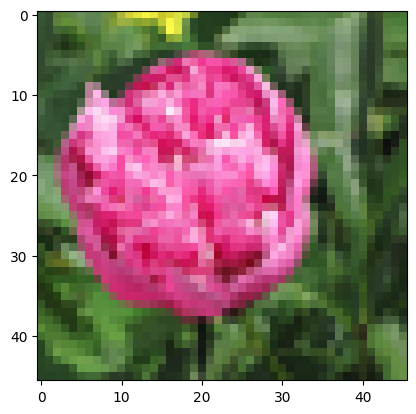

In [2]:
# Load Flower Dataset
img_dir = "./datasets/flowers"
train_x = np.empty((len(os.listdir(img_dir)), 46, 46, 3), dtype=np.uint8)

for i, img_file in enumerate(os.listdir(img_dir)):
    img_path = os.path.join(img_dir, img_file)
    img = Image.open(img_path).convert("RGB").resize((46, 46))
    train_x[i] = np.array(img)

plt.imshow(train_x[0])
    
# Normalize dataset
train_x_norm = train_x/255
print(f"Original dataset: max val = {np.max(train_x)} | min val = {np.min(train_x)}")
print(f"Normalized dataset: max val = {np.max(train_x_norm)} | min val = {np.min(train_x_norm)}")

# Show one example image
plt.imshow(train_x[random.randint(0,len(train_x))]);

In [3]:
# Reshaping dataset (Conv2D wants input = (batch_size, height, width, channels))
x_train_reshaped = tf.convert_to_tensor(train_x_norm)
print(f"Dataset shape: {x_train_reshaped.shape}")

Dataset shape: (813, 46, 46, 3)


2023-04-05 21:00:00.339387: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 21:00:00.339899: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-05 21:00:00.341053: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2023-04-05 21:00:00.341074: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-05 21:00:00.341091: I tensorflow/stream_executor/platform/default/ds

In [4]:
def build_discriminator():
    model = keras.Sequential([
        keras.layers.Conv2D(input_shape=(46, 46, 3), filters=32, kernel_size=5, padding="same", activation=keras.layers.LeakyReLU(alpha=0.2)),
        keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
        keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation=keras.layers.LeakyReLU(alpha=0.2)),
        keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=1024, activation=keras.layers.LeakyReLU(alpha=0.2)),
        keras.layers.Dense(units=1, activation="sigmoid")
    ])
    
    return model

In [5]:
test_discriminator_model = build_discriminator()
test_discriminator_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        2432      
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        51264     
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              7930880   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

**Testing model with sample image**

In [6]:
print(test_discriminator_model.predict(x_train_reshaped[0:1]))

2023-04-05 21:00:00.948826: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-04-05 21:00:00.949311: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3198120000 Hz
2023-04-05 21:00:01.011742: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-04-05 21:00:01.129312: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-04-05 21:00:01.584674: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-04-05 21:00:01.632339: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


[[0.49992692]]


In [7]:
from tensorflow.keras.layers import Layer

class CustomUpsample(Layer):
    def __init__(self, size=(2, 2), **kwargs):
        super().__init__(**kwargs)
        self.size = size
    
    def call(self, inputs):
        return tf.image.resize(inputs, size=self.size, method=tf.image.ResizeMethod.BILINEAR)

In [8]:
def build_generator(n, output_dim=46):
    l = ((output_dim*2)**2)*3
    
    model = keras.Sequential([
        keras.layers.Dense(input_shape=(n,), units=l, activation="relu"),
        keras.layers.Reshape((output_dim*2, output_dim*2, 3), input_shape=(l,)),
        keras.layers.Conv2D(filters=int(n/2), kernel_size=3, strides=(2, 2), padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),
        CustomUpsample((output_dim*2+2, output_dim*2+2)),
        keras.layers.Conv2D(filters=int(n/4), kernel_size=3, strides=(2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),
        CustomUpsample((output_dim*2+2, output_dim*2+2)),
        keras.layers.Conv2D(filters=3, kernel_size=3, strides=(2, 2), activation="sigmoid")      
    ])
    
    return model


In [9]:
test_generator_model = build_generator(100, output_dim=46)
test_generator_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 25392)             2564592   
_________________________________________________________________
reshape (Reshape)            (None, 92, 92, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 50)        1400      
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 50)        200       
_________________________________________________________________
re_lu (ReLU)                 (None, 46, 46, 50)        0         
_________________________________________________________________
custom_upsample (CustomUpsam (None, 94, 94, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 25)       

**Testing model with sample noise**

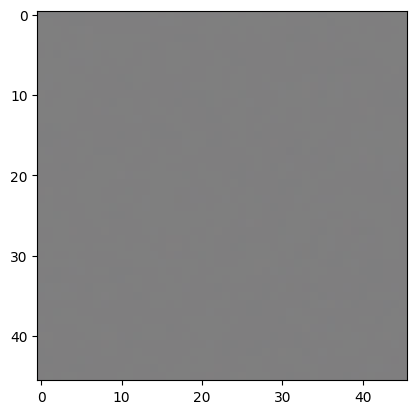

In [10]:
test_out = test_generator_model.predict(([random.random() for _ in range(100)],))
plt.imshow((test_out*255).astype('uint8').squeeze());

In [11]:
@tf.function
def binary_cross_entropy(y_true, y_pred, from_logits=True):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=from_logits)
    loss = bce(y_true, y_pred)
    return loss

@tf.function
def calc_discriminator_loss(real_output, fake_output):
    real_output_loss = binary_cross_entropy(tf.ones_like(real_output), real_output, from_logits=False)
    fake_output_loss = binary_cross_entropy(tf.zeros_like(fake_output), fake_output, from_logits=False)
    
    total_loss = real_output_loss + fake_output_loss
    return tf.reduce_mean(total_loss)

@tf.function
def calc_generator_loss(fake_output):
    g_loss = binary_cross_entropy(tf.ones_like(fake_output), fake_output)
    return g_loss

In [12]:
def create_log_folder():
    current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
    log_dir = os.path.join("./tensorboard/flowers", current_time)

    if not os.path.exists(log_dir):
        os.makedirs(log_dir)

    file_writer = tf.summary.create_file_writer(log_dir)
    
    return file_writer, log_dir

In [13]:
# Show images of a batch
def show_imgs_of_batch(image_batch):
    fig = plt.figure()

    for i in range(len(image_batch)):
        fig.add_subplot(1, len(image_batch), i+1)
        plt.imshow(image_batch[i], cmap="gray")
        plt.axis('off')
    plt.show()

In [14]:
def pretrain_step(image_batch, generator_model, discriminator_model, discriminator_optimizer, noise_vector_length=100, show_details=False):
    image_batch = tf.convert_to_tensor(image_batch)   
    
    if show_details:
        show_imgs_of_batch(image_batch)
    
    # Generate fake images
    noise = tf.random.normal([len(image_batch), noise_vector_length])
    fake_img_batch = generator_model(noise, training=False)
    
    if show_details:
        show_imgs_of_batch(fake_img_batch)
    
    # Loss
    with tf.GradientTape(persistent=True) as tape:
        real_img_predictions = discriminator_model(image_batch, training=True)   
        fake_img_predictions = discriminator_model(fake_img_batch, training=True)
        
        if show_details:
            print(f"Real predictions:\n{real_img_predictions}\n"
                  f"Fake predictions:\n{fake_img_predictions}")
        
        loss = calc_discriminator_loss(real_img_predictions, fake_img_predictions)
        
        if show_details:
            print(f"Loss: {loss}")

    # Get gradients
    gradients = tape.gradient(loss, discriminator_model.trainable_variables)
    
    # Apply gradients to weights in model
    discriminator_optimizer.apply_gradients(zip(gradients, discriminator_model.trainable_variables))

    return {"loss": loss.numpy(), 
            "real_img_confidence": tf.reduce_mean(real_img_predictions).numpy(),
            "fake_img_confidence": tf.reduce_mean(fake_img_predictions).numpy()}

In [15]:
def pretraining(batch_size, steps, generator_model, discriminator_model, discriminator_optimizer, train_data=x_train_reshaped):
    step_results = []
    fig = plt.figure(dpi=80)
    batches = [train_data[x:x+batch_size] for x in range(0, len(train_data),batch_size)]
    if len(batches) > steps:
        batches = batches[:steps]
    
    for batch_imgs in batches:
        step_result = pretrain_step(batch_imgs, generator_model, discriminator_model, discriminator_optimizer, show_details=False)
        step_results.append(step_result)
    
    # Plot
    fig.add_subplot(2, 1, 1)
    
    plt.plot([val["loss"] for val in step_results], "b")
    plt.title("Discriminator Pretraining")
    plt.ylabel("Loss")
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    
    fig.add_subplot(2, 1, 2)
    plt.plot([val["real_img_confidence"] for val in step_results], "g", label="Real Images")
    plt.plot([val["fake_img_confidence"] for val in step_results], "r", label="Fake Images")
    plt.xlabel("Step")
    plt.ylabel("Confidence") 
    plt.legend()
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    
    plt.show()

In [16]:
def train_step(image_batch, generator_model, discriminator_model, discriminator_optimizer, generator_optimizer, noise_vector_length=100, show_details=False):
    image_batch = tf.convert_to_tensor(image_batch)   
    
    # Loss
    with tf.GradientTape(persistent=True) as tape:
        # Generate fake images
        noise = tf.random.normal([len(image_batch), noise_vector_length])
        fake_img_batch = generator_model(noise, training=False)
        
        # Discriminator prediction for real and fakes
        real_img_predictions = discriminator_model(image_batch, training=True)   
        fake_img_predictions = discriminator_model(fake_img_batch, training=True)
        
        # Losses for both models
        dis_loss = calc_discriminator_loss(real_img_predictions, fake_img_predictions)
        gen_loss = calc_generator_loss(fake_img_predictions)
        
        if show_details:
            print(f"Discriminator Loss: {dis_loss}")
            print(f"Generator Loss: {gen_loss}")
            print(len(fake_img_batch))
            show_imgs_of_batch(fake_img_batch[0:5])
        
    # Get gradients
    dis_gradients = tape.gradient(dis_loss, discriminator_model.trainable_variables)
    gen_gradients = tape.gradient(gen_loss, generator_model.trainable_variables)

    # Apply gradients to weights in model
    discriminator_optimizer.apply_gradients(zip(dis_gradients, discriminator_model.trainable_weights))
    generator_optimizer.apply_gradients(zip(gen_gradients, generator_model.trainable_variables))
    
    return {"discriminator_loss": dis_loss.numpy(),
            "generator_loss": gen_loss.numpy(),
            "sample_images": fake_img_batch[:4]}

In [17]:
def training(batch_size, epochs, generator_model, discriminator_model, discriminator_optimizer, generator_optimizer, train_data=x_train_reshaped, plot_every_x_epochs=10, file_writer=None):
    step_results_list = []
    total_trained_on_images = 0
    total_weight_adjustments = 0
    start_time = time.time()
    
    for epoch in range(1, epochs+1):
        
        # Shuffle new batches
        tf.random.shuffle(train_data)
        batches = [train_data[x:x+batch_size] for x in range(0, len(train_data),batch_size)]
        if len(batches[-1]) != batch_size:
            batches = batches[:-1]
        
        # Train one epoch 
        for batch_imgs in batches:
            step_results = train_step(batch_imgs, generator_model, discriminator_model, discriminator_optimizer, generator_optimizer)
            step_results_list.append({"discriminator_loss": step_results["discriminator_loss"], "generator_loss": step_results["generator_loss"]})
            
            total_trained_on_images += len(batch_imgs)
            total_weight_adjustments += 1
            
            # Write to file every 10 steps as described in the task
            if total_weight_adjustments % 10 == 0 and file_writer != None:
                with file_writer.as_default():
                    tf.summary.scalar("generator_loss", step_results['generator_loss'], step=total_weight_adjustments)
                    tf.summary.scalar("discriminator_loss", step_results['discriminator_loss'], step=total_weight_adjustments)
                    for i in range(1, len(step_results["sample_images"])):
                        tf.summary.image(f"sample_img_{i}", step_results["sample_images"][i-1:i], step=total_weight_adjustments)
                

        # Summary
        if epoch % plot_every_x_epochs == 0 or epoch == 1:
                        
            # Print summary
            print(f"Summary after epoch {epoch}\n" +"="*(20+len(str(epoch))))
            print(f"Training progress: {round((epoch/epochs)*100)}%")
            print(f"Time elapsed: {round(time.time() - start_time)} seconds")
            print(f"Current Discriminator Loss: {str(step_results['discriminator_loss'])[:5]}")
            print(f"Current Generator Loss: {str(step_results['generator_loss'])[:5]}")
            print(f"Total trained on images: {total_trained_on_images}")
            print(f"Total weight adjustments: {total_weight_adjustments}")
            
            # Plot summary
            fig = plt.figure(figsize=(8, 3), dpi=80)
            gs = fig.add_gridspec(2,5)
            
            ax1 = fig.add_subplot(gs[:, 0:3])
            ax1.plot([val["discriminator_loss"] for val in step_results_list], "r", label="Discriminator")
            ax1.plot([val["generator_loss"] for val in step_results_list], "g", label="Generator")
            ax1.set_title(f"Training after epoch {epoch}")
            ax1.set_xlabel("Step")
            ax1.set_ylabel("Loss")
            ax1.legend()
            
            ax2 = fig.add_subplot(gs[0, 3])
            ax2.imshow(step_results["sample_images"][0], cmap="gray")
            ax2.axis('off')
            ax3 = fig.add_subplot(gs[1, 3])          
            ax3.imshow(step_results["sample_images"][1], cmap="gray")
            ax3.axis('off')
            ax4 = fig.add_subplot(gs[0, 4])
            ax4.imshow(step_results["sample_images"][2], cmap="gray")
            ax4.axis('off')
            ax5 = fig.add_subplot(gs[1, 4])          
            ax5.imshow(step_results["sample_images"][3], cmap="gray")
            ax5.axis('off')

            plt.show()

In [27]:
def complete_training(generator_learn_rate, discriminator_learn_rate, batch_size, pretraining_steps, training_epochs, create_new_models=True, open_tensorboard=False):
    
    if create_new_models:
        # New models
        generator_model = build_generator(100)
        discriminator_model = build_discriminator()
        # Optimizers
        generator_optimizer = tf.keras.optimizers.Adam(generator_learn_rate)
        discriminator_optimizer = tf.keras.optimizers.Adam(discriminator_learn_rate)
        # Compile models
        discriminator_model.compile(loss=calc_discriminator_loss, optimizer=discriminator_optimizer)
        generator_model.compile(loss=calc_generator_loss, optimizer=generator_optimizer)
        print(">> Created new Models")
        
    # Create log folder
    file_writer, log_dir = create_log_folder()
    
    # Training
    if pretraining_steps > 0:
        print(">> Beginning Pretraining")
        pretrain_start_time = time.time()
        pretraining(batch_size, pretraining_steps, generator_model, discriminator_model, discriminator_optimizer, train_data=x_train_reshaped)
        print(f">> Finished Pretraining after {round(time.time() - pretrain_start_time)} seconds")
    else:
        print(">> Skipping Pretraining")
    
    print(">> Beginning Training\n")
    train_start_time = time.time()
    training(batch_size, training_epochs, generator_model, discriminator_model, discriminator_optimizer, generator_optimizer, plot_every_x_epochs=100, file_writer=file_writer)
    print(f">> Finished Training after {round(time.time() - train_start_time)} seconds")
    
    if open_tensorboard:
        print(f">> Opening Tensorboard")
        !tensorboard --logdir={log_dir}
    
    return generator_model

Summary after epoch 4200
Training progress: 70%
Time elapsed: 2445 seconds
Current Discriminator Loss: 1.289
Current Generator Loss: 0.495
Total trained on images: 3225600
Total weight adjustments: 25200


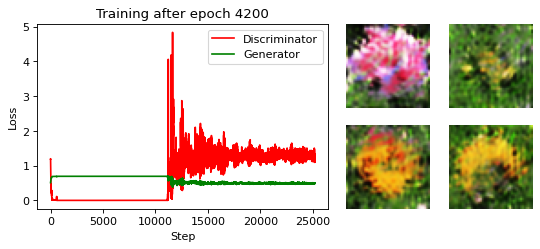

Summary after epoch 4300
Training progress: 72%
Time elapsed: 2503 seconds
Current Discriminator Loss: 1.473
Current Generator Loss: 0.482
Total trained on images: 3302400
Total weight adjustments: 25800


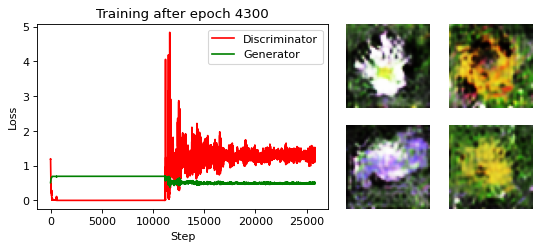

Summary after epoch 4400
Training progress: 73%
Time elapsed: 2561 seconds
Current Discriminator Loss: 1.151
Current Generator Loss: 0.518
Total trained on images: 3379200
Total weight adjustments: 26400


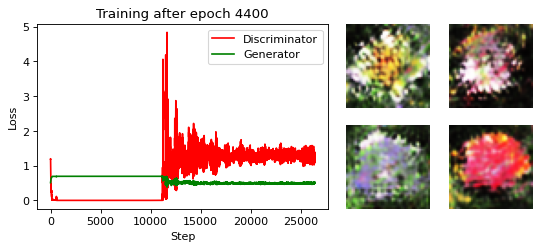

Summary after epoch 4500
Training progress: 75%
Time elapsed: 2620 seconds
Current Discriminator Loss: 1.276
Current Generator Loss: 0.495
Total trained on images: 3456000
Total weight adjustments: 27000


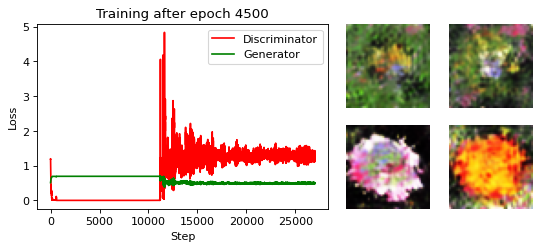

Summary after epoch 4600
Training progress: 77%
Time elapsed: 2678 seconds
Current Discriminator Loss: 1.193
Current Generator Loss: 0.497
Total trained on images: 3532800
Total weight adjustments: 27600


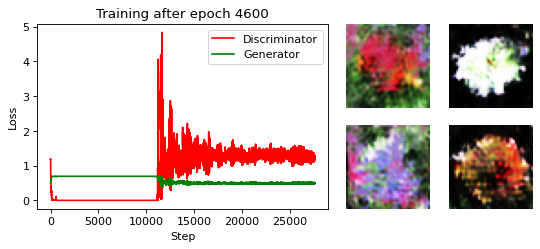

Summary after epoch 4700
Training progress: 78%
Time elapsed: 2736 seconds
Current Discriminator Loss: 1.225
Current Generator Loss: 0.500
Total trained on images: 3609600
Total weight adjustments: 28200


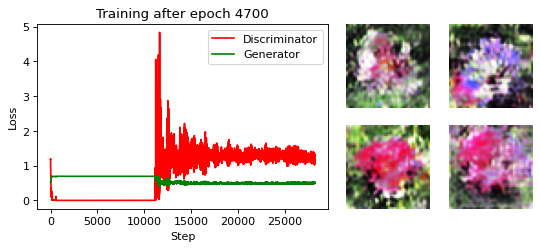

Summary after epoch 4800
Training progress: 80%
Time elapsed: 2794 seconds
Current Discriminator Loss: 1.175
Current Generator Loss: 0.505
Total trained on images: 3686400
Total weight adjustments: 28800


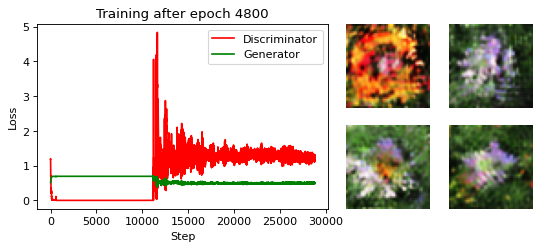

Summary after epoch 4900
Training progress: 82%
Time elapsed: 2852 seconds
Current Discriminator Loss: 1.199
Current Generator Loss: 0.511
Total trained on images: 3763200
Total weight adjustments: 29400


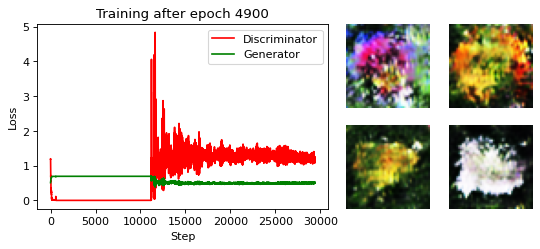

Summary after epoch 5000
Training progress: 83%
Time elapsed: 2911 seconds
Current Discriminator Loss: 1.288
Current Generator Loss: 0.496
Total trained on images: 3840000
Total weight adjustments: 30000


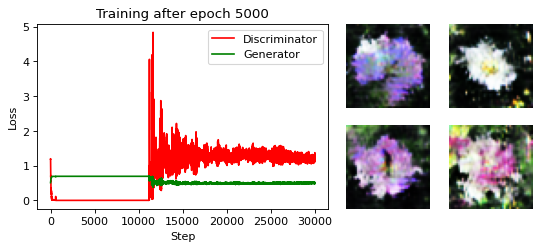

Summary after epoch 5100
Training progress: 85%
Time elapsed: 2969 seconds
Current Discriminator Loss: 1.155
Current Generator Loss: 0.502
Total trained on images: 3916800
Total weight adjustments: 30600


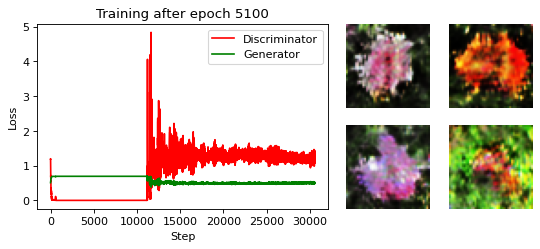

Summary after epoch 5200
Training progress: 87%
Time elapsed: 3028 seconds
Current Discriminator Loss: 1.238
Current Generator Loss: 0.505
Total trained on images: 3993600
Total weight adjustments: 31200


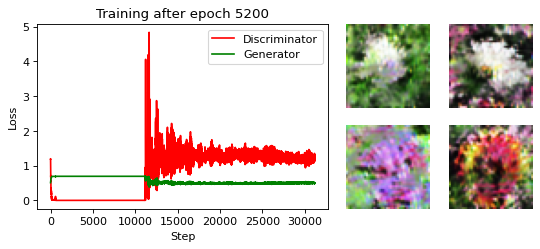

Summary after epoch 5300
Training progress: 88%
Time elapsed: 3086 seconds
Current Discriminator Loss: 1.126
Current Generator Loss: 0.515
Total trained on images: 4070400
Total weight adjustments: 31800


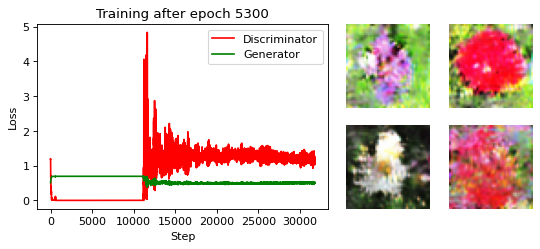

Summary after epoch 5400
Training progress: 90%
Time elapsed: 3145 seconds
Current Discriminator Loss: 1.221
Current Generator Loss: 0.508
Total trained on images: 4147200
Total weight adjustments: 32400


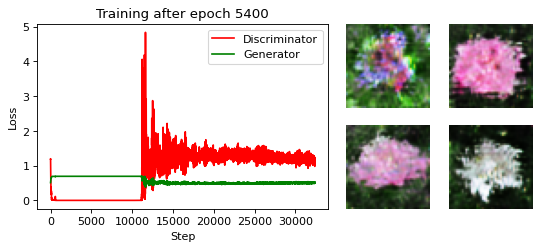

Summary after epoch 5500
Training progress: 92%
Time elapsed: 3203 seconds
Current Discriminator Loss: 1.236
Current Generator Loss: 0.500
Total trained on images: 4224000
Total weight adjustments: 33000


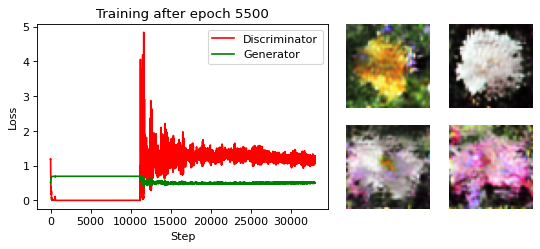

Summary after epoch 5600
Training progress: 93%
Time elapsed: 3261 seconds
Current Discriminator Loss: 1.209
Current Generator Loss: 0.518
Total trained on images: 4300800
Total weight adjustments: 33600


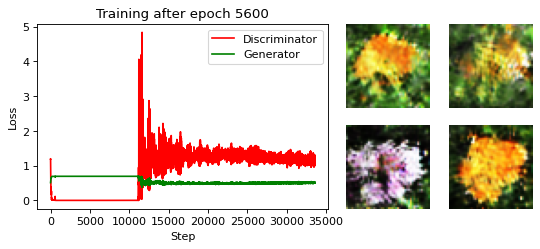

Summary after epoch 5700
Training progress: 95%
Time elapsed: 3319 seconds
Current Discriminator Loss: 1.156
Current Generator Loss: 0.511
Total trained on images: 4377600
Total weight adjustments: 34200


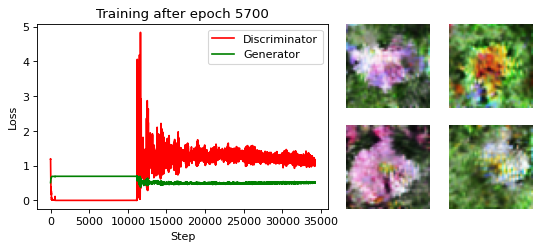

Summary after epoch 5800
Training progress: 97%
Time elapsed: 3377 seconds
Current Discriminator Loss: 1.024
Current Generator Loss: 0.529
Total trained on images: 4454400
Total weight adjustments: 34800


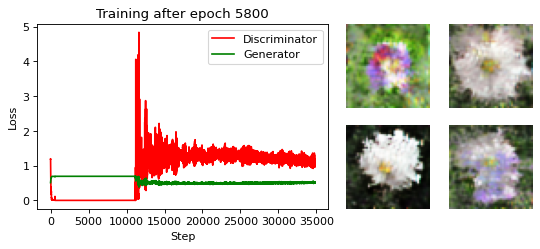

Summary after epoch 5900
Training progress: 98%
Time elapsed: 3435 seconds
Current Discriminator Loss: 1.101
Current Generator Loss: 0.506
Total trained on images: 4531200
Total weight adjustments: 35400


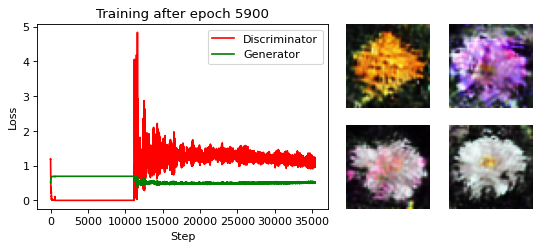

Summary after epoch 6000
Training progress: 100%
Time elapsed: 3493 seconds
Current Discriminator Loss: 1.072
Current Generator Loss: 0.518
Total trained on images: 4608000
Total weight adjustments: 36000


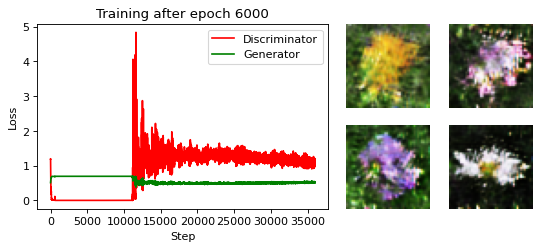

>> Finished Training after 3493 seconds


In [28]:
generator_model = complete_training(generator_learn_rate=0.0001, 
                                    discriminator_learn_rate=0.00002, 
                                    batch_size=128, 
                                    pretraining_steps=20, 
                                    training_epochs=6000)

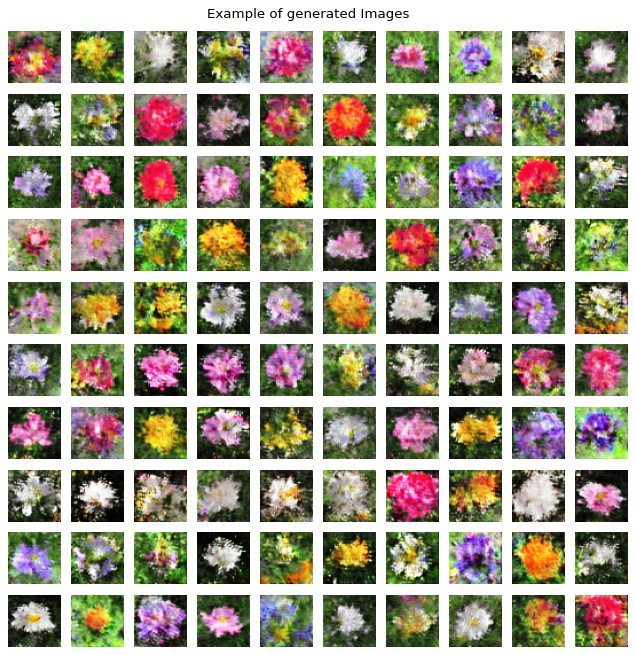

In [29]:
noise = tf.random.normal([100, 100])
fake_img_batch = generator_model(noise, training=False)

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10), dpi=80)
plt.suptitle("Example of generated Images", y=0.91)
for i in range(10):
    for j in range(10):
        axes[i][j].imshow(fake_img_batch[i*10+j], cmap="gray")
        axes[i][j].axis('off')

plt.show()